<a href="https://colab.research.google.com/github/sheunq/Data-Science/blob/main/Telco_Churn_Customer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About Dataset

Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

New version from IBM:
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Gender: The customer’s gender: Male, Female

Age: The customer’s current age, in years, at the time the fiscal quarter ended.

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Married: Indicates if the customer is married: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure in Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection Plan: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Premium Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

In [154]:
import sys
assert sys.version_info>=(3,5)
import sklearn
assert sklearn.__version__ >= "0.20"

import os
import pandas as pd
import numpy as np
import seaborn as sns


%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)


image_path=os.path.join('.','images','all_image')
os.makedirs(image_path,exist_ok=True)

def savefig(fig_id,tight_layout=True,resolution=300,fig_extension='png'):
  path=os.path.join(image_path,fig_id+'.'+fig_extension)
  print(f'saving figure {fig_id}')
  if tight_layout:
    plt.tight_layout()

  plt.savefig(path,format=fig_extension,dpi=resolution)

from IPython.display import display

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import (mutual_info_score,
                             classification_report,
                             roc_curve, 
                             auc)

## import data

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df.describe(include='all')

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043.000000,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,NaN,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2265.000258,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,402.225000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1400.550000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.600000,NaN


In [ ]:
df.columns=df.columns.str.lower()

df['totalcharges']=pd.to_numeric(df['totalcharges'],errors='coerce')

df['totalcharges'].fillna(df['totalcharges'].mean(),inplace=True)

unique=df.select_dtypes(include='object').describe(include='all').iloc[1,1:].to_frame()
unique

,unique
gender,2
partner,2
dependents,2
phoneservice,2
multiplelines,3
internetservice,3
onlinesecurity,3
onlinebackup,3
deviceprotection,3
techsupport,3


In [ ]:
df['totalcharges'].isna().sum()

0

In [ ]:
category=df.select_dtypes(include='object').iloc[:,1:]
category.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [ ]:
numeric=df.select_dtypes(exclude='object')
numeric.head()

,seniorcitizen,tenure,monthlycharges,totalcharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [ ]:
# convert all string values to lower
for col in category.columns:
  category[col]=category[col].str.lower()

In [ ]:
category.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn
0,female,yes,no,no,no phone service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic check,no
1,male,no,no,yes,no,dsl,yes,no,yes,no,no,no,one year,no,mailed check,no
2,male,no,no,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed check,yes
3,male,no,no,no,no phone service,dsl,yes,no,yes,yes,no,no,one year,no,bank transfer (automatic),no
4,female,no,no,yes,no,fiber optic,no,no,no,no,no,no,month-to-month,yes,electronic check,yes


## Correlation

In [ ]:
category.columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [ ]:
corr=category.join(numeric)
encode=OrdinalEncoder()
corr=pd.DataFrame(encode.fit_transform(corr),columns=corr.columns)
corr.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0,142.0,74.0
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0,34.0,498.0,3624.0
2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0,2.0,436.0,536.0
3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45.0,266.0,3570.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,2.0,729.0,674.0


In [ ]:
corr.corr().round(3)

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
gender,1.000,-0.002,0.011,-0.006,-0.007,-0.001,-0.015,-0.012,0.001,-0.007,-0.006,-0.009,0.000,-0.012,0.017,-0.009,-0.002,0.005,-0.015,-0.001
partner,-0.002,1.000,0.453,0.018,0.142,0.001,0.151,0.153,0.166,0.127,0.137,0.130,0.295,-0.015,-0.155,-0.150,0.016,0.380,0.107,0.342
dependents,0.011,0.453,1.000,-0.002,-0.025,0.045,0.152,0.091,0.081,0.134,0.047,0.021,0.243,-0.111,-0.040,-0.164,-0.211,0.160,-0.108,0.082
phoneservice,-0.006,0.018,-0.002,1.000,-0.021,0.387,-0.015,0.024,0.004,-0.019,0.055,0.044,0.002,0.017,-0.004,0.012,0.009,0.008,0.271,0.086
multiplelines,-0.007,0.142,-0.025,-0.021,1.000,-0.109,0.007,0.117,0.122,0.011,0.175,0.181,0.111,0.165,-0.177,0.038,0.146,0.343,0.445,0.463
internetservice,-0.001,0.001,0.045,0.387,-0.109,1.000,-0.028,0.036,0.045,-0.026,0.107,0.098,0.100,-0.139,0.086,-0.047,-0.032,-0.030,-0.245,-0.209
onlinesecurity,-0.015,0.151,0.152,-0.015,0.007,-0.028,1.000,0.185,0.176,0.285,0.045,0.056,0.374,-0.158,-0.097,-0.289,-0.128,0.325,-0.045,0.247
onlinebackup,-0.012,0.153,0.091,0.024,0.117,0.036,0.185,1.000,0.188,0.196,0.147,0.137,0.281,-0.013,-0.125,-0.196,-0.014,0.371,0.141,0.352
deviceprotection,0.001,0.166,0.081,0.004,0.122,0.045,0.176,0.188,1.000,0.241,0.277,0.289,0.350,-0.038,-0.136,-0.178,-0.021,0.371,0.190,0.371
techsupport,-0.007,0.127,0.134,-0.019,0.011,-0.026,0.285,0.196,0.241,1.000,0.161,0.161,0.425,-0.114,-0.105,-0.282,-0.151,0.323,0.006,0.263


saving figure correlation_map.png


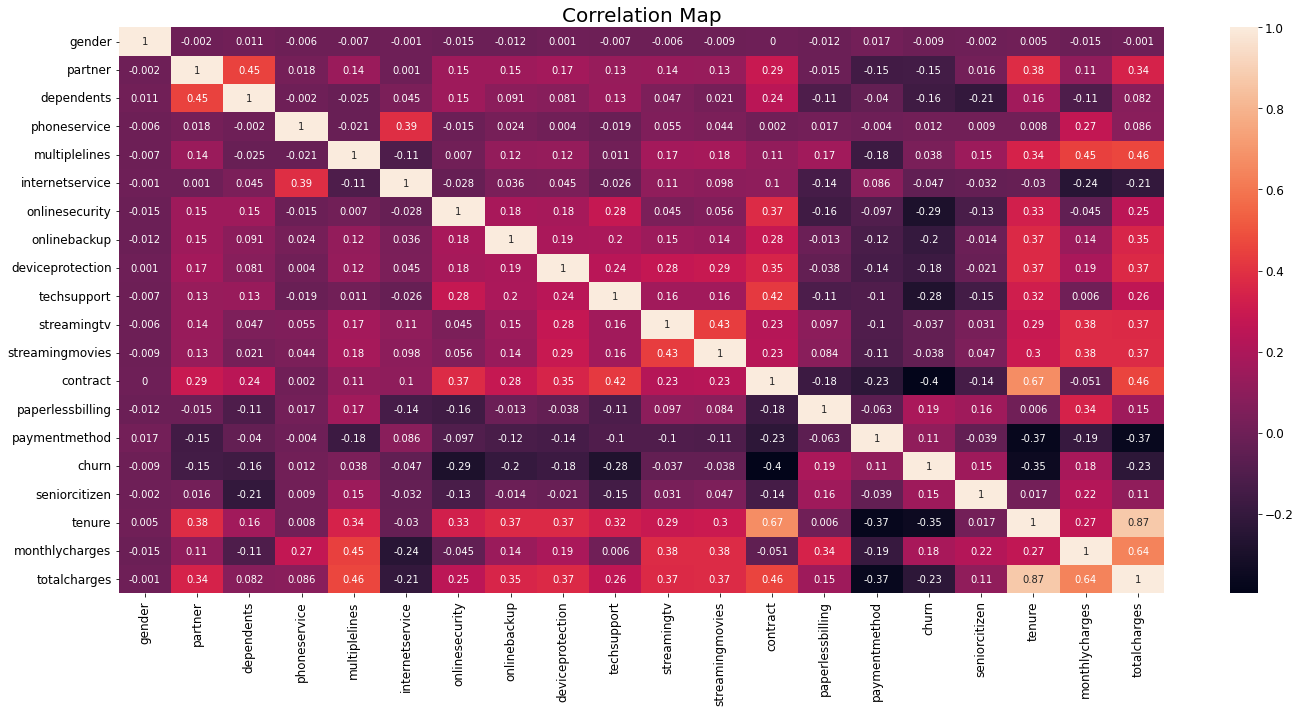

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr.corr().round(3),annot=True)
plt.title('Correlation Map',size=20)
savefig('correlation_map.png')

In [ ]:
category.columns

Index(['gender', 'partner', 'dependents', 'phoneservice', 'multiplelines',
       'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'paperlessbilling', 'paymentmethod', 'churn'],
      dtype='object')

In [ ]:
numeric.columns

Index(['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges'], dtype='object')

<AxesSubplot:xlabel='tenure', ylabel='monthlycharges'>

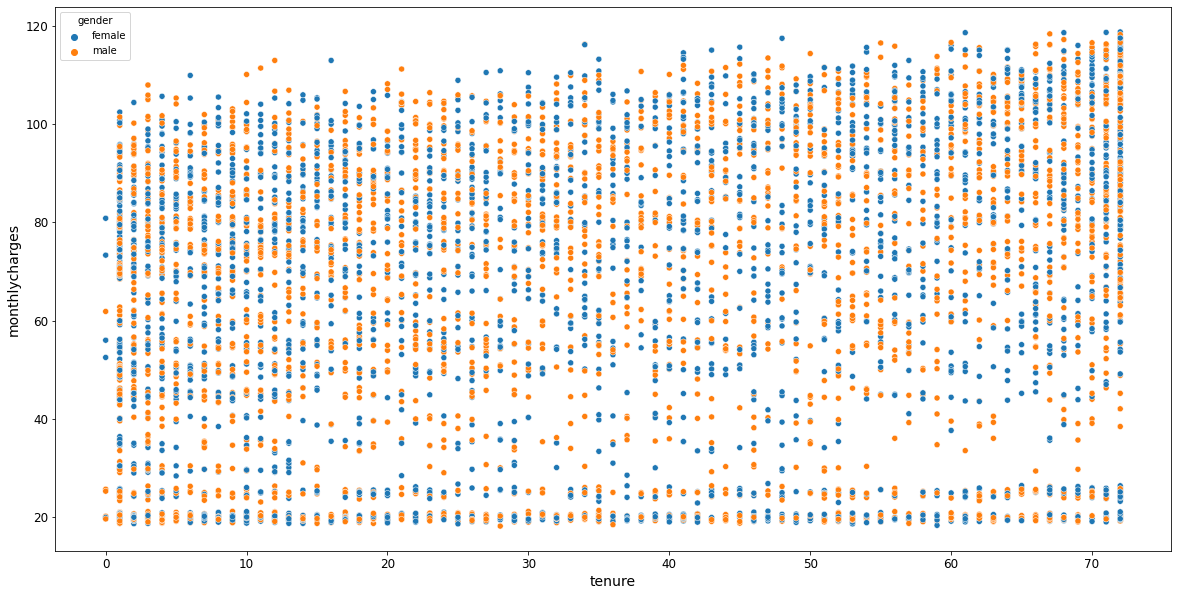

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=numeric.tenure,y=numeric.monthlycharges,hue=category.gender)

<AxesSubplot:xlabel='tenure', ylabel='totalcharges'>

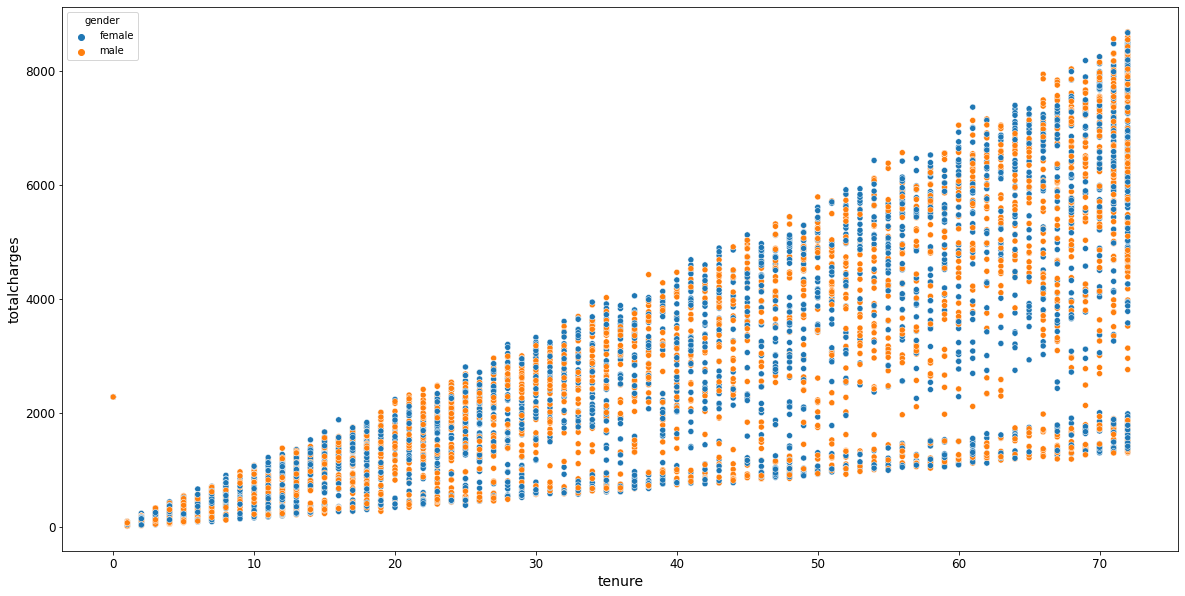

In [83]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=numeric.tenure,y=numeric.totalcharges,hue=category.gender)

<AxesSubplot:xlabel='tenure', ylabel='monthlycharges'>

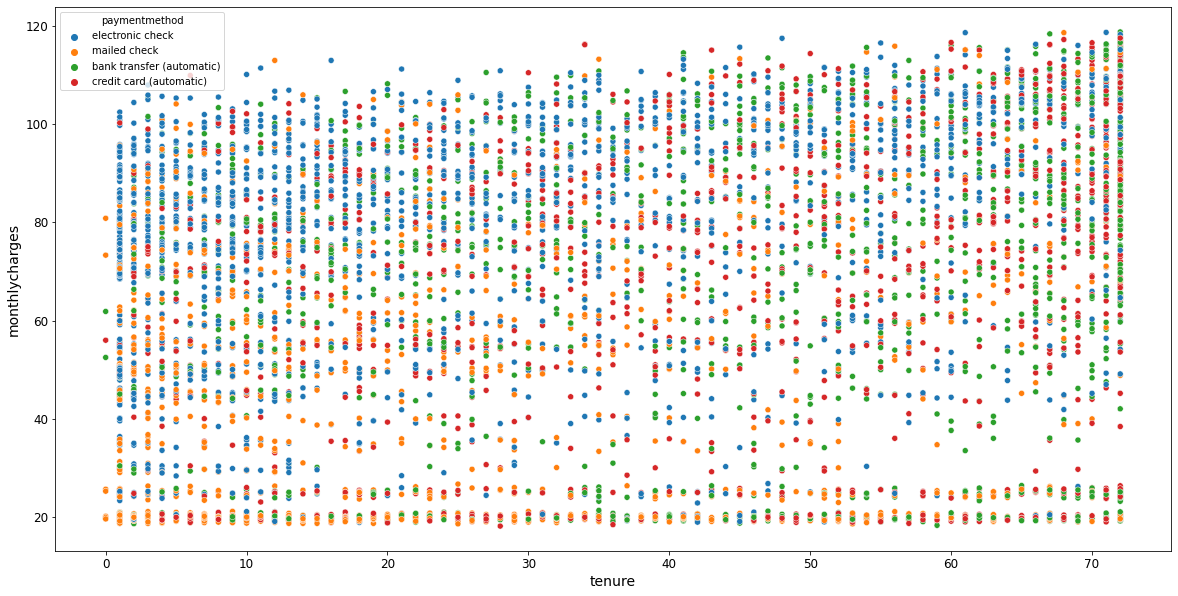

In [82]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=numeric.tenure,y=numeric.monthlycharges,hue=category.paymentmethod)

<AxesSubplot:xlabel='tenure', ylabel='totalcharges'>

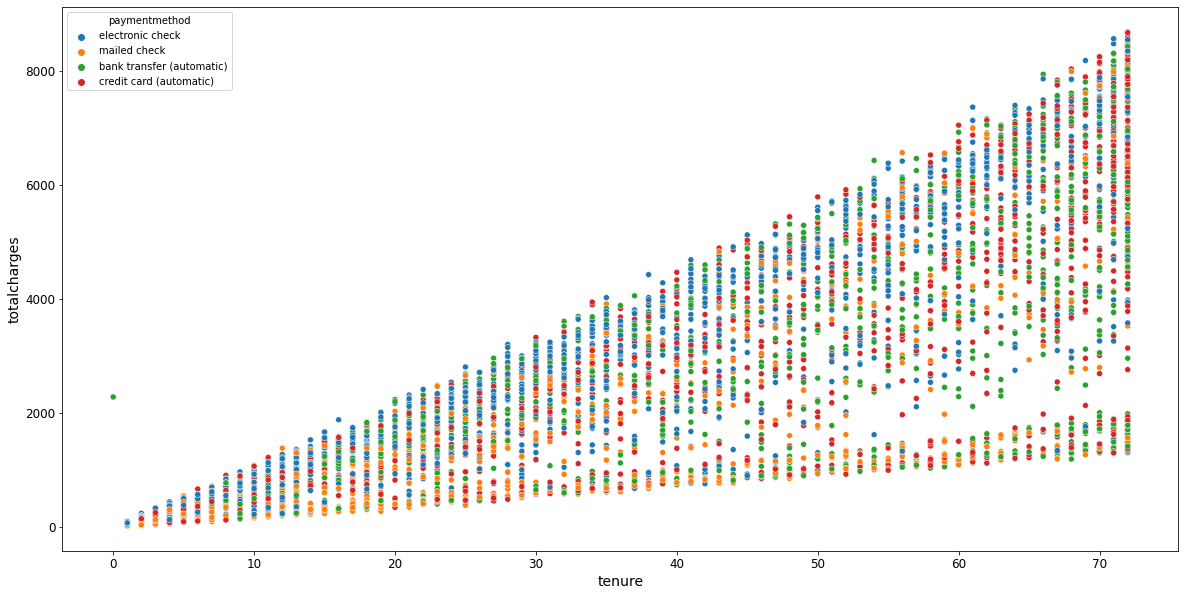

In [84]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=numeric.tenure,y=numeric.totalcharges,hue=category.paymentmethod)

In [77]:
import plotly.express as px

In [81]:
fig=px.scatter(x=category.gender,y=numeric.monthlycharges)
fig.show()

## Exploratory Data Analysis-EDA

In [87]:
df1=category.join(numeric)
for c in df1.columns:
    display(df1.groupby([df1[c]]).mean())

,seniorcitizen,tenure,monthlycharges,totalcharges
gender,,,,
female,0.162844,32.244553,65.204243,2283.191142
male,0.161463,32.495359,64.327482,2283.407680


,seniorcitizen,tenure,monthlycharges,totalcharges
partner,,,,
no,0.156276,23.357869,61.945001,1585.344027
yes,0.168430,42.017637,67.776264,3030.290242


,seniorcitizen,tenure,monthlycharges,totalcharges
dependents,,,,
no,0.213055,29.806000,67.002808,2187.709254
yes,0.043128,38.368246,59.522156,2506.784481


,seniorcitizen,tenure,monthlycharges,totalcharges
phoneservice,,,,
no,0.152493,31.737537,42.028592,1502.729547
yes,0.163182,32.439082,67.199041,2366.990010


,seniorcitizen,tenure,monthlycharges,totalcharges
multiplelines,,,,
no,0.110029,24.134808,54.195059,1351.209853
no phone service,0.152493,31.737537,42.028592,1502.729547
yes,0.223830,41.914507,82.036974,3526.025598


,seniorcitizen,tenure,monthlycharges,totalcharges
internetservice,,,,
dsl,0.106981,32.821561,58.102169,2120.126953
fiber optic,0.268411,32.917959,91.500129,3205.304570
no,0.034076,30.547182,21.079194,671.582374


,seniorcitizen,tenure,monthlycharges,totalcharges
onlinesecurity,,,,
no,0.230989,25.850772,75.693067,2136.319969
no internet service,0.034076,30.547182,21.079194,671.582374
yes,0.139673,45.046558,78.838732,3756.118401


,seniorcitizen,tenure,monthlycharges,totalcharges
onlinebackup,,,,
no,0.198834,23.680699,71.938002,1828.295758
no internet service,0.034076,30.547182,21.079194,671.582374
yes,0.195965,44.565253,83.081597,3874.299301


,seniorcitizen,tenure,monthlycharges,totalcharges
deviceprotection,,,,
no,0.201616,23.696931,70.601050,1798.916705
no internet service,0.034076,30.547182,21.079194,671.582374
yes,0.192403,44.604872,84.822254,3917.755203


,seniorcitizen,tenure,monthlycharges,totalcharges
techsupport,,,,
no,0.238986,25.844227,74.586683,2089.942370
no internet service,0.034076,30.547182,21.079194,671.582374
yes,0.127202,44.822896,80.680137,3815.107853


,seniorcitizen,tenure,monthlycharges,totalcharges
streamingtv,,,,
no,0.184342,24.985409,65.387687,1735.602776
no internet service,0.034076,30.547182,21.079194,671.582374
yes,0.211304,41.066125,88.736738,3760.401367


,seniorcitizen,tenure,monthlycharges,totalcharges
streamingmovies,,,,
no,0.177738,24.712388,65.434147,1716.347433
no internet service,0.034076,30.547182,21.079194,671.582374
yes,0.217789,41.197291,88.475714,3761.501721


,seniorcitizen,tenure,monthlycharges,totalcharges
contract,,,,
month-to-month,0.208258,18.036645,66.398490,1369.254581
one year,0.128988,42.044807,65.048608,3034.172981
two year,0.085546,56.735103,60.770413,3720.405135


,seniorcitizen,tenure,monthlycharges,totalcharges
paperlessbilling,,,,
no,0.092618,32.189067,51.992967,1852.940618
yes,0.210022,32.496524,73.553776,2579.630676


,seniorcitizen,tenure,monthlycharges,totalcharges
paymentmethod,,,,
bank transfer (automatic),0.150907,43.656736,67.192649,3078.268459
credit card (automatic),0.145204,43.269382,66.512385,3070.878220
electronic check,0.251163,25.174630,76.255814,2090.868182
mailed check,0.058313,21.830025,43.917060,1060.582260


,seniorcitizen,tenure,monthlycharges,totalcharges
churn,,,,
no,0.128721,37.569965,61.265124,2554.765772
yes,0.254682,17.979133,74.441332,1531.796094


,tenure,monthlycharges,totalcharges
seniorcitizen,,,
0,32.192171,61.847441,2181.280080
1,33.295972,79.820359,2810.465193


,seniorcitizen,monthlycharges,totalcharges
tenure,,,
0,0.000000,41.418182,2283.300441
1,0.140294,50.485808,50.485808
2,0.180672,57.206303,114.332353
3,0.125000,58.015000,174.690000
4,0.147727,57.432670,230.530682
...,...,...,...
68,0.130000,73.321000,5006.300000
69,0.136842,70.823158,4876.041579
70,0.142857,76.378992,5349.057143


,seniorcitizen,tenure,totalcharges
monthlycharges,,,
18.25,0.0,28.0,534.700
18.40,0.0,59.0,1057.850
18.55,0.0,36.0,689.000
18.70,0.0,39.0,694.675
18.75,0.0,2.0,53.150
...,...,...,...
118.20,0.0,72.0,8547.150
118.35,0.0,67.0,7804.150
118.60,0.0,64.5,7677.875


,seniorcitizen,tenure,monthlycharges
totalcharges,,,
18.80,0.0,1.0,18.80
18.85,0.0,1.0,18.85
18.90,0.0,1.0,18.90
19.00,0.0,1.0,19.00
19.05,0.0,1.0,19.05
...,...,...,...
8564.75,0.0,71.0,116.25
8594.40,0.0,72.0,116.95
8670.10,0.0,72.0,117.50


In [88]:
for c in df1.columns:
    display(df1.groupby([df1[c]]).count())

,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
gender,,,,,,,,,,,,,,,,,,,
female,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488,3488
male,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555,3555


,gender,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
partner,,,,,,,,,,,,,,,,,,,
no,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641,3641
yes,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402,3402


,gender,partner,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
dependents,,,,,,,,,,,,,,,,,,,
no,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933,4933
yes,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110,2110


,gender,partner,dependents,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
phoneservice,,,,,,,,,,,,,,,,,,,
no,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
yes,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361,6361


,gender,partner,dependents,phoneservice,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
multiplelines,,,,,,,,,,,,,,,,,,,
no,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390,3390
no phone service,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682,682
yes,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971,2971


,gender,partner,dependents,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
internetservice,,,,,,,,,,,,,,,,,,,
dsl,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421,2421
fiber optic,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096,3096
no,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
onlinesecurity,,,,,,,,,,,,,,,,,,,
no,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498,3498
no internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
yes,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
onlinebackup,,,,,,,,,,,,,,,,,,,
no,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088,3088
no internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
yes,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429,2429


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
deviceprotection,,,,,,,,,,,,,,,,,,,
no,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095
no internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
yes,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422,2422


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
techsupport,,,,,,,,,,,,,,,,,,,
no,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473,3473
no internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
yes,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044,2044


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
streamingtv,,,,,,,,,,,,,,,,,,,
no,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810,2810
no internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
yes,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707,2707


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
streamingmovies,,,,,,,,,,,,,,,,,,,
no,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785,2785
no internet service,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526,1526
yes,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732,2732


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
contract,,,,,,,,,,,,,,,,,,,
month-to-month,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875,3875
one year,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473,1473
two year,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695,1695


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paymentmethod,churn,seniorcitizen,tenure,monthlycharges,totalcharges
paperlessbilling,,,,,,,,,,,,,,,,,,,
no,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872,2872
yes,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,churn,seniorcitizen,tenure,monthlycharges,totalcharges
paymentmethod,,,,,,,,,,,,,,,,,,,
bank transfer (automatic),1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544,1544
credit card (automatic),1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522,1522
electronic check,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365,2365
mailed check,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612,1612


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,seniorcitizen,tenure,monthlycharges,totalcharges
churn,,,,,,,,,,,,,,,,,,,
no,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174,5174
yes,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869,1869


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,tenure,monthlycharges,totalcharges
seniorcitizen,,,,,,,,,,,,,,,,,,,
0,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901,5901
1,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142,1142


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,monthlycharges,totalcharges
tenure,,,,,,,,,,,,,,,,,,,
0,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
1,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613,613
2,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238,238
3,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200,200
4,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100,100
69,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95,95
70,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119,119


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,totalcharges
monthlycharges,,,,,,,,,,,,,,,,,,,
18.25,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.55,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.70,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
18.75,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118.20,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
118.35,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
118.60,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,churn,seniorcitizen,tenure,monthlycharges
totalcharges,,,,,,,,,,,,,,,,,,,
18.80,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
18.85,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
18.90,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19.00,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19.05,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8564.75,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8594.40,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
8670.10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [90]:
for c in df1.select_dtypes(include='object').columns:
    display(df1[c].value_counts())

male      3555
female    3488
Name: gender, dtype: int64

no     3641
yes    3402
Name: partner, dtype: int64

no     4933
yes    2110
Name: dependents, dtype: int64

yes    6361
no      682
Name: phoneservice, dtype: int64

no                  3390
yes                 2971
no phone service     682
Name: multiplelines, dtype: int64

fiber optic    3096
dsl            2421
no             1526
Name: internetservice, dtype: int64

no                     3498
yes                    2019
no internet service    1526
Name: onlinesecurity, dtype: int64

no                     3088
yes                    2429
no internet service    1526
Name: onlinebackup, dtype: int64

no                     3095
yes                    2422
no internet service    1526
Name: deviceprotection, dtype: int64

no                     3473
yes                    2044
no internet service    1526
Name: techsupport, dtype: int64

no                     2810
yes                    2707
no internet service    1526
Name: streamingtv, dtype: int64

no                     2785
yes                    2732
no internet service    1526
Name: streamingmovies, dtype: int64

month-to-month    3875
two year          1695
one year          1473
Name: contract, dtype: int64

yes    4171
no     2872
Name: paperlessbilling, dtype: int64

electronic check             2365
mailed check                 1612
bank transfer (automatic)    1544
credit card (automatic)      1522
Name: paymentmethod, dtype: int64

no     5174
yes    1869
Name: churn, dtype: int64

## Data splitting

In [93]:
# splitting into feature and label
x,y=df1.drop('churn',axis=1),df1.churn

In [94]:
encode=OrdinalEncoder()
x=pd.DataFrame(encode.fit_transform(x),columns=x.columns)
x.head()

,gender,partner,dependents,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,seniorcitizen,tenure,monthlycharges,totalcharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,142.0,74.0
1,1.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,34.0,498.0,3624.0
2,1.0,0.0,0.0,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,2.0,436.0,536.0
3,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,45.0,266.0,3570.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,729.0,674.0


In [96]:
#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


## Model

In [98]:
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [99]:
model.predict(x_test)

array(['yes', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [103]:
model.predict_proba(x_test)

array([[0.41654397, 0.58345603],
       [0.87940692, 0.12059308],
       [0.98286527, 0.01713473],
       ...,
       [0.94800226, 0.05199774],
       [0.96547363, 0.03452637],
       [0.52273894, 0.47726106]])

In [110]:
model.intercept_

array([-0.20275976])

In [106]:
model.coef_[0]

array([-9.81255649e-02, -5.36523342e-03, -1.74712368e-01, -3.60274202e-01,
        1.60208798e-01, -8.92811297e-02, -3.74063116e-01, -1.51475580e-01,
       -4.04225892e-02, -3.42723759e-01,  6.75713734e-02,  1.35003497e-01,
       -6.27350764e-01,  2.32900208e-01, -3.62698961e-03,  1.83178074e-01,
        3.91939064e-03,  2.11126811e-03, -5.53889913e-04])

In [104]:
y_pred=model.predict_proba(x_test)[:,1]

## Model Evaluation

In [102]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

          no       0.85      0.90      0.88      1036
         yes       0.67      0.55      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



# Dict Vectorizer

In [112]:
dict_=df1.to_dict(orient='records')

In [124]:
dict_[0]

{'gender': 'female',
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'no',
 'multiplelines': 'no phone service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic check',
 'churn': 'no',
 'seniorcitizen': 0,
 'tenure': 1,
 'monthlycharges': 29.85,
 'totalcharges': 29.85}

In [122]:
dv=DictVectorizer()
dv=dv.fit(dict_)

In [145]:
#dv.get_feature_names()

## Mutual Score

In [134]:
def mutual_score(x):
  return mutual_info_score(x,y_train)
cal_msi=x_train.apply(mutual_score)
print(cal_msi.to_frame(name='mutual info score'))

                  mutual info score
gender                     0.000069
partner                    0.010227
dependents                 0.014129
phoneservice               0.000040
multiplelines              0.000654
internetservice            0.053313
onlinesecurity             0.063393
onlinebackup               0.045424
deviceprotection           0.042007
techsupport                0.060935
streamingtv                0.030844
streamingmovies            0.030705
contract                   0.096652
paperlessbilling           0.019077
paymentmethod              0.042861
seniorcitizen              0.010059
tenure                     0.078155
monthlycharges             0.197598
totalcharges               0.545207


# Confusion Table

In [136]:
conf_y=y_test.map({'yes':1,'no':0})

In [140]:
truepositive=((y_pred>=0.5)&(conf_y==1)).sum()
falsepositive=((y_pred>=0.5)&(conf_y==0)).sum()
truenegative=((y_pred<0.5)&(conf_y==1)).sum()
falsenegative=((y_pred<0.5)&(conf_y==0)).sum()

In [143]:
confusion_table=np.array([[truepositive,falsepositive],
                         [truenegative,falsenegative]])
confusion_table

array([[206, 100],
       [167, 936]])

In [144]:
confusion_table/confusion_table.sum()

array([[0.14620298, 0.07097232],
       [0.11852378, 0.66430092]])

## ROC and AUC

In [149]:
scores=[]

thresholds=np.linspace(0,1,101)

for i in thresholds:
  truepositive=((y_pred>=i)&(conf_y==1)).sum()
  falsepositive=((y_pred>=i)&(conf_y==0)).sum()
  truenegative=((y_pred<i)&(conf_y==1)).sum()
  falsenegative=((y_pred<i)&(conf_y==0)).sum()
  scores.append((i,truepositive,falsepositive,truenegative,falsenegative))
df_scores=pd.DataFrame(scores,columns=['thresholds','truepositive','falsepositive','truenegative','falsenegative'])
df_scores.head()

,thresholds,truepositive,falsepositive,truenegative,falsenegative
0,0.00,373,1036,0,0
1,0.01,373,1024,0,12
2,0.02,371,930,2,106
3,0.03,370,825,3,211
4,0.04,370,749,3,287


In [150]:
df_scores['tpr']=df_scores.truepositive/(df_scores.truepositive+df_scores.falsenegative)
df_scores['fpr']=df_scores.falsepositive/(df_scores.falsepositive+df_scores.truenegative)

In [151]:
df_scores.sample(5)

,thresholds,truepositive,falsepositive,truenegative,falsenegative,tpr,fpr
14,0.14,347,451,26,585,0.372318,0.945493
93,0.93,2,0,371,1036,0.001927,0.000000
3,0.03,370,825,3,211,0.636833,0.996377
28,0.28,291,247,82,789,0.269444,0.750760
61,0.61,146,51,227,985,0.129089,0.183453


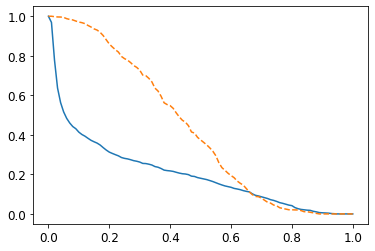

In [152]:
plt.figure(figsize=(6,4))


plt.plot(df_scores.thresholds,df_scores.tpr)
plt.plot(df_scores.thresholds,df_scores.fpr,'--')

In [155]:
fpr, tpr,thresholds=roc_curve(conf_y,y_pred)

Text(0.5, 1.0, 'ROC Curve')

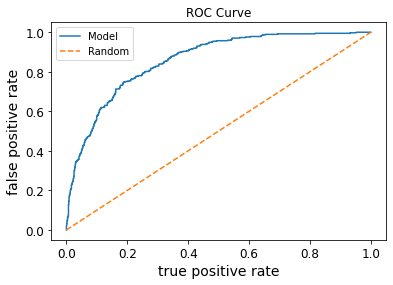

In [156]:
plt.plot(fpr, tpr,label='Model')
plt.plot([0,1],[0,1],'--',label='Random')
plt.legend()

plt.ylabel('false positive rate')
plt.xlabel('true positive rate')


plt.title('ROC Curve')

In [157]:
auc(df_scores.fpr,df_scores.tpr)

0.2153262168268305